In [1]:
import fitsio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [22]:
#data source ftp://ftp.caha.es/CALIFA/dataproducts/DR2/Pipe3D/
data_EW = fitsio.read("../data/flux_elines.NGC3614.cube.fits.gz")
print fitsio.read_header("../data/flux_elines.NGC3614.cube.fits.gz")
print np.shape(data_EW)
OII_line = data_EW[0,:,:]
OII_EW = data_EW[153,:,:]
Halpha_line = data_EW[45,:,:]
Halpha_EW = data_EW[198,:,:]
Hbeta_line = data_EW[28,:,:]


SIMPLE  =                    T / Created with PDL (http://pdl.perl.org)
BITPIX  =                  -64 / number of bits per data pixel
NAXIS   =                    3 / number of data axes
NAXIS1  =                   77 / length of data axis 1
NAXIS2  =                   73 / length of data axis 2
NAXIS3  =                  408
BUNIT   = 'Data Value'
EXTEND  =                    T / FITS dataset may contain extensions
HIERARCH V500 PPAK P1 LONGSTRN = 'OGIP 1.0' / The HEASARC Long String Convention
HIERARCH V500 PPAK P1 PVERSION = '1.0     ' / PMAS fitsheader version
HIERARCH V500 PPAK P1 FILENAME = 'run213_00141a.fits' / original filename
HIERARCH V500 PPAK P1 CFNAMEB = 'run213_00141b.fits' / corresponding filename
HIERARCH V500 PPAK P1 CFNAMEC = 'run213_00141c.fits' / corresponding filename
HIERARCH V500 PPAK P1 CFNAMED = 'run213_00141d.fits' / corresponding filename
HIERARCH V500 PPAK P1 DATE = '2012-03-18T22:44:59' / file creation
HIERARCH V500 PPAK P1 OBSERVER = 'C.Sengupta'
HIERAR

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


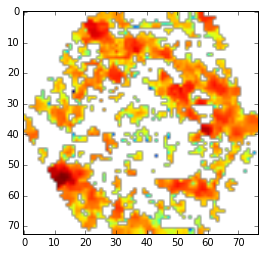

In [9]:
plt.imshow(np.log10(OII_line)) # This is the OII line intensity

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


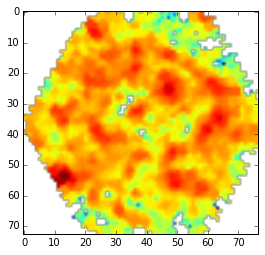

In [23]:
plt.imshow(np.log10(Hbeta_line)) # This is the OII line intensity

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


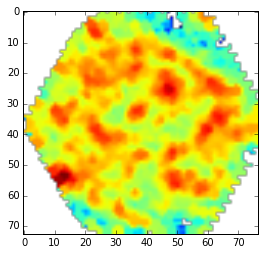

In [24]:
plt.imshow(np.log10(Halpha_line)) # This is the Halpha line intensity

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


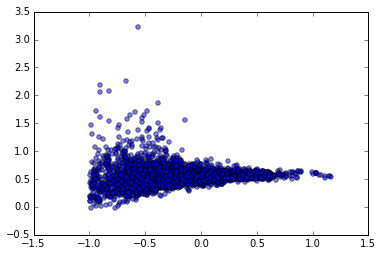

In [43]:
ii = (Halpha_line>0.1) & (Hbeta_line>0.0)
line_ratio = Halpha_line/Hbeta_line
plt.scatter(np.log10(Halpha_line[ii]), np.log10(line_ratio[ii]), alpha=0.5)

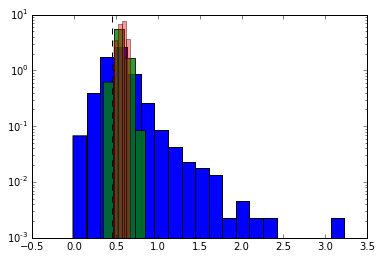

In [42]:
ii = (Halpha_line>0.1) & (Halpha_line<1.0)  & (Hbeta_line>0.0) # faint
a = plt.hist(np.log10(line_ratio[ii]), bins=20, log=True, normed=True)

ii = (Halpha_line>1.0) & (Halpha_line<4.0)  & (Hbeta_line>0.0) # mid range
a = plt.hist(np.log10(line_ratio[ii]), bins=4, log=True, normed=True, alpha=0.8)

ii = (Halpha_line>4.0) & (Hbeta_line>0.0) # bright
a = plt.hist(np.log10(line_ratio[ii]), bins=4, log=True, normed=True, alpha=0.4)

theoretical_ratio = 2.85
plt.axvline(x=np.log10(theoretical_ratio), color='k', linestyle='--')